In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify_song_data= pd.read_csv("spotify_cleaned1.csv")

In [3]:
song_data=spotify_song_data.copy()
song_data.head(3)

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.694,0.000000,0.1150,0.139,133.406,3,4.002767
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.477,0.000014,0.0974,0.515,140.182,4,3.606450
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.338,0.000050,0.0895,0.145,139.832,4,2.649333


In [4]:
song_data['audio_mode'] = song_data['mode']
song_data['song_popularity'] = song_data['popularity']

In [5]:
song_data.song_duration_mins= song_data.duration_mins.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_11328\1343553489.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  song_data.song_duration_mins= song_data.duration_mins.astype(float)


In [6]:
song_data.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins,audio_mode,song_popularity
count,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06,1.000821e+06
mean,2.111917e+01,2.012531e+03,5.358290e-01,6.424273e-01,5.281731e+00,-8.784069e+00,6.340464e-01,8.059365e-02,3.093828e-01,2.452720e-01,2.168697e-01,4.520140e-01,1.217771e+02,3.894193e+00,4.106626e+00,6.340464e-01,2.111917e+01
std,1.531630e+01,6.790153e+00,1.842568e-01,2.698020e-01,3.557785e+00,5.645781e+00,4.816968e-01,8.000754e-02,3.471977e-01,3.619095e-01,1.939616e-01,2.680425e-01,2.982316e+01,4.427876e-01,2.305992e+00,4.816968e-01,1.531630e+01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.666667e-02,0.000000e+00,0.000000e+00
25%,9.000000e+00,2.007000e+03,4.120000e-01,4.590000e-01,2.000000e+00,-1.047100e+01,0.000000e+00,3.660000e-02,6.610000e-03,1.070000e-06,9.790000e-02,2.230000e-01,9.900600e+01,4.000000e+00,3.036883e+00,0.000000e+00,9.000000e+00
50%,1.800000e+01,2.013000e+03,5.480000e-01,6.970000e-01,5.000000e+00,-7.245000e+00,1.000000e+00,4.950000e-02,1.380000e-01,1.480000e-03,1.320000e-01,4.320000e-01,1.218990e+02,4.000000e+00,3.749783e+00,1.000000e+00,1.800000e+01
75%,3.100000e+01,2.018000e+03,6.750000e-01,8.740000e-01,8.000000e+00,-5.172000e+00,1.000000e+00,8.540000e-02,6.000000e-01,5.760000e-01,2.830000e-01,6.690000e-01,1.399950e+02,4.000000e+00,4.692883e+00,1.000000e+00,3.100000e+01
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,6.600000e-01,9.960000e-01,9.990000e-01,1.000000e+00,1.000000e+00,2.497920e+02,5.000000e+00,1.000083e+02,1.000000e+00,1.000000e+02


In [7]:
# 計算人氣度的75百分位數 (因為我們要取最高的25%，所以我們使用75百分位數作為閾值)
threshold = song_data['song_popularity'].quantile(0.75)



# 使用布林索引選擇人氣度前25%的歌曲
top_25_percent_songs = song_data[song_data['song_popularity'] >= threshold]



# 計算並顯示這些歌曲的數量
num_of_songs25 = len(top_25_percent_songs)
print(num_of_songs25)

259492


In [8]:
# 選擇人氣度前25%的歌曲
top_25_percent_songs = song_data[song_data['song_popularity'] >= threshold]

# 選擇人氣度後75%的歌曲
bottom_75_percent_songs = song_data[song_data['song_popularity'] < threshold]

# 從人氣度後75%的歌曲中隨機挑選與前25%數量相同的歌曲
random_seed = 42
sampled_75_percent_songs = bottom_75_percent_songs.sample(n=len(top_25_percent_songs),random_state=random_seed)

# 合併上述兩個子集以創建新的DataFrame
song_data = pd.concat([top_25_percent_songs, sampled_75_percent_songs], axis=0).reset_index(drop=True)

In [9]:
song_data["popularity"]= [ 1 if i>=30 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

1    265587
0    253397
Name: popularity, dtype: int64

In [10]:
#popular songs' data
a=song_data[song_data["popularity"]==1]
a.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins,audio_mode,song_popularity
count,265587.0,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000,265587.000000
mean,1.0,2015.369250,0.575229,0.640011,5.306472,-8.099123,0.614281,0.085222,0.293596,0.167842,0.201055,0.457265,121.684336,3.911170,3.721690,0.614281,41.903828
std,0.0,6.187694,0.170684,0.252005,3.566493,5.415282,0.486766,0.086472,0.324454,0.318315,0.174420,0.251170,29.911784,0.410685,1.487456,0.486766,9.586711
min,1.0,2000.000000,0.000000,0.000000,0.000000,-52.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094350,0.000000,30.000000
25%,1.0,2012.000000,0.466000,0.482000,2.000000,-9.368000,0.000000,0.036200,0.015900,0.000000,0.098100,0.251000,98.071000,4.000000,2.968608,0.000000,34.000000
50%,1.0,2017.000000,0.588000,0.684000,5.000000,-6.678000,1.000000,0.049500,0.146000,0.000072,0.126000,0.441000,121.070000,4.000000,3.539583,1.000000,40.000000
75%,1.0,2020.000000,0.701000,0.847000,8.000000,-4.873000,1.000000,0.090500,0.527000,0.084700,0.253000,0.654000,140.046000,4.000000,4.217733,1.000000,47.000000
max,1.0,2023.000000,0.990000,1.000000,11.000000,3.795000,1.000000,0.660000,0.996000,0.999000,1.000000,0.998000,241.345000,5.000000,87.288267,1.000000,100.000000


In [11]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [12]:
song_data.loc[detect_outliers(song_data,["song_popularity","duration_mins","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"])]

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins,audio_mode,song_popularity
194754,Matheus & Kauan,Não Vitalício (Nunca Mais) - Ao Vivo,1,2023,sertanejo,0.418,0.9250,1,-2.941,1,0.385,0.39600,0.00000,0.766,0.62700,71.490,4.0,2.830600,1.0,82
221098,Gorillaz,Feel Good Inc.,1,2005,hip-hop,0.818,0.7050,6,-6.679,1,0.177,0.00836,0.00233,0.613,0.77200,138.559,4.0,3.710667,1.0,82
1109,Roy Buchanan,Hey Joe - Live,1,2012,blues,0.374,0.6610,4,-10.511,0,0.190,0.71800,0.24700,0.766,0.58000,119.633,4.0,7.273550,0.0,37
3462,Rampue,Zwitscherzwitscher,1,2012,electronic,0.913,0.6920,9,-9.503,0,0.214,0.04700,0.61200,0.557,0.50100,106.977,4.0,10.491667,0.0,37
4005,Banda Som e Louvor,Festa de Crente (Ao Vivo),1,2012,forro,0.393,0.9500,11,-4.671,0,0.212,0.36600,0.00000,0.817,0.55300,175.276,4.0,8.025583,0.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502179,Hins Cheung,日與夜,0,2015,cantopop,0.434,0.1440,5,-22.433,1,0.231,0.86800,0.00000,0.785,0.14600,100.173,4.0,3.914883,1.0,12
514289,John Shuttleworth,Dandelion & Burdock,0,2001,comedy,0.685,0.3710,9,-23.062,1,0.324,0.56200,0.00000,0.659,0.90900,143.966,4.0,3.739550,1.0,2
514562,Musica Relajante,Asian Meditacion Zen,0,2012,sleep,0.320,0.5690,3,-18.834,0,0.195,0.96800,0.92500,0.960,0.02540,89.584,4.0,2.486200,0.0,14
518575,Robbins Island Music Group,Falling Rain Chases the Loons Away,0,2014,sleep,0.186,0.9630,10,-35.840,0,0.415,0.06900,0.88600,0.591,0.00393,110.577,4.0,4.433333,0.0,5


In [13]:
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","duration_mins","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"]),axis = 0).reset_index(drop = True)

In [14]:
song_data[song_data["audio_mode"].isnull()]

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins,audio_mode,song_popularity


In [15]:
spotify_song_data['song_popularity'] = spotify_song_data['popularity']
spotify_song_data['song_name'] = spotify_song_data['track_name']
song_data['song_name'] = song_data['track_name']

In [16]:
# 計算人氣度的75百分位數 (因為我們要取最高的25%，所以我們使用75百分位數作為閾值)
threshold = spotify_song_data['song_popularity'].quantile(0.75)



# 使用布林索引選擇人氣度前25%的歌曲
top_25_percent_songs = spotify_song_data[spotify_song_data['song_popularity'] >= threshold]



# 計算並顯示這些歌曲的數量
num_of_songs25 = len(top_25_percent_songs)
print(num_of_songs25)

259492


In [17]:
# 選擇人氣度前25%的歌曲
top_25_percent_songs = spotify_song_data[spotify_song_data['song_popularity'] >= threshold]

# 選擇人氣度後75%的歌曲
bottom_75_percent_songs = spotify_song_data[spotify_song_data['song_popularity'] < threshold]

# 從人氣度後75%的歌曲中隨機挑選與前25%數量相同的歌曲
random_seed = 42
sampled_75_percent_songs = bottom_75_percent_songs.sample(n=len(top_25_percent_songs),random_state=random_seed)

# 合併上述兩個子集以創建新的DataFrame
spotify_song_data = pd.concat([top_25_percent_songs, sampled_75_percent_songs], axis=0).reset_index(drop=True)

In [18]:
spotify_song_data["popularity"]= [ 1 if i>=30 else 0 for i in spotify_song_data.song_popularity ]
spotify_song_data["popularity"].value_counts()

1    265587
0    253397
Name: popularity, dtype: int64

In [19]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)
data_plr.head()

,popularity,song_name
0,1,I Won't Give Up
1,1,93 Million Miles
2,1,Do Not Let Me Go
3,1,Fast Car
4,1,Sky's Still Blue


In [20]:
song_data['song_name'].value_counts(dropna=False)
song_data['song_name'].dropna(inplace=True)

In [21]:
import re
import nltk 
import nltk as nlp

nltk.download("stopwords") 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
Song_Name = [ word for word in spotify_song_data.song_name if not word in set(stopwords.words("english"))]
lemma = nlp.WordNetLemmatizer()
Song_Name = [ lemma.lemmatize(word) for word in Song_Name] 

In [23]:
Song_Name_list = []
for Song_Name in data_plr.song_name:
    Song_Name = re.sub("[^a-zA-Z]"," ",Song_Name)
    Song_Name = Song_Name.lower() 
    Song_Name = nltk.word_tokenize(Song_Name)
    lemma = nlp.WordNetLemmatizer()
    Song_Name = [ lemma.lemmatize(word) for word in Song_Name]
    Song_Name = " ".join(Song_Name)
    Song_Name_list.append(Song_Name)

In [24]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(Song_Name_list).toarray()  
print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names_out()))

en sik kullanilan 10 kelimeler: ['ao' 'edit' 'feat' 'la' 'live' 'love' 'mix' 'remix' 'version' 'vivo']


In [25]:
a = count_vectorizer.get_feature_names_out()

In [26]:
df=pd.DataFrame(Song_Name_list,columns=['Names'])

In [27]:
from textblob import TextBlob
data_plr['sentiment'] = data_plr['song_name'].map(lambda text: TextBlob(text).sentiment.polarity)

In [28]:
import numpy as np
cut = pd.cut(
    data_plr['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
data_plr['polarity'] = cut.values
data_plr[['polarity','sentiment']].head()

,polarity,sentiment
0,neutral,0.0
1,neutral,0.0
2,neutral,0.0
3,positive,0.2
4,neutral,0.0


In [29]:
song_data =pd.concat([song_data,data_plr.sentiment],axis=1)
song_data.head(3)

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,duration_mins,audio_mode,song_popularity,song_name,sentiment
0,Jason Mraz,I Won't Give Up,1.0,2012.0,acoustic,0.483,0.303,4.0,-10.058,1.0,...,0.000000,0.1150,0.139,133.406,3.0,4.002767,1.0,68.0,I Won't Give Up,0.0
1,Jason Mraz,93 Million Miles,1.0,2012.0,acoustic,0.572,0.454,3.0,-10.286,1.0,...,0.000014,0.0974,0.515,140.182,4.0,3.606450,1.0,50.0,93 Million Miles,0.0
2,Joshua Hyslop,Do Not Let Me Go,1.0,2012.0,acoustic,0.409,0.234,3.0,-13.711,1.0,...,0.000050,0.0895,0.145,139.832,4.0,2.649333,1.0,57.0,Do Not Let Me Go,0.0


In [30]:
song_data["key"] = song_data["key"].astype("category")
song_data = pd.get_dummies(song_data, columns=["key"])
song_data.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,loudness,mode,speechiness,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,Jason Mraz,I Won't Give Up,1.0,2012.0,acoustic,0.483,0.303,-10.058,1.0,0.0429,...,0,0,1,0,0,0,0,0,0,0
1,Jason Mraz,93 Million Miles,1.0,2012.0,acoustic,0.572,0.454,-10.286,1.0,0.0258,...,0,1,0,0,0,0,0,0,0,0
2,Joshua Hyslop,Do Not Let Me Go,1.0,2012.0,acoustic,0.409,0.234,-13.711,1.0,0.0323,...,0,1,0,0,0,0,0,0,0,0
3,Boyce Avenue,Fast Car,1.0,2012.0,acoustic,0.392,0.251,-9.845,1.0,0.0363,...,0,0,0,0,0,0,0,0,1,0
4,Andrew Belle,Sky's Still Blue,1.0,2012.0,acoustic,0.430,0.791,-5.419,0.0,0.0302,...,0,0,0,0,1,0,0,0,0,0


In [31]:
song_data["audio_mode"] = song_data["audio_mode"].astype("category")
song_data = pd.get_dummies(song_data, columns=["audio_mode"])
song_data.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,loudness,mode,speechiness,...,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,audio_mode_0.0,audio_mode_1.0
0,Jason Mraz,I Won't Give Up,1.0,2012.0,acoustic,0.483,0.303,-10.058,1.0,0.0429,...,1,0,0,0,0,0,0,0,0,1
1,Jason Mraz,93 Million Miles,1.0,2012.0,acoustic,0.572,0.454,-10.286,1.0,0.0258,...,0,0,0,0,0,0,0,0,0,1
2,Joshua Hyslop,Do Not Let Me Go,1.0,2012.0,acoustic,0.409,0.234,-13.711,1.0,0.0323,...,0,0,0,0,0,0,0,0,0,1
3,Boyce Avenue,Fast Car,1.0,2012.0,acoustic,0.392,0.251,-9.845,1.0,0.0363,...,0,0,0,0,0,0,1,0,0,1
4,Andrew Belle,Sky's Still Blue,1.0,2012.0,acoustic,0.430,0.791,-5.419,0.0,0.0302,...,0,0,1,0,0,0,0,0,1,0


In [32]:
song_data["time_signature"] = song_data["time_signature"].astype("category")
song_data = pd.get_dummies(song_data, columns=["time_signature"])
song_data.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,loudness,mode,speechiness,...,key_9.0,key_10.0,key_11.0,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,Jason Mraz,I Won't Give Up,1.0,2012.0,acoustic,0.483,0.303,-10.058,1.0,0.0429,...,0,0,0,0,1,0,0,1,0,0
1,Jason Mraz,93 Million Miles,1.0,2012.0,acoustic,0.572,0.454,-10.286,1.0,0.0258,...,0,0,0,0,1,0,0,0,1,0
2,Joshua Hyslop,Do Not Let Me Go,1.0,2012.0,acoustic,0.409,0.234,-13.711,1.0,0.0323,...,0,0,0,0,1,0,0,0,1,0
3,Boyce Avenue,Fast Car,1.0,2012.0,acoustic,0.392,0.251,-9.845,1.0,0.0363,...,0,1,0,0,1,0,0,0,1,0
4,Andrew Belle,Sky's Still Blue,1.0,2012.0,acoustic,0.430,0.791,-5.419,0.0,0.0302,...,0,0,0,1,0,0,0,0,1,0


In [33]:
song_data.drop(["song_popularity","song_name",'artist_name','track_name','year','genre','mode'],axis=1,inplace=True)

In [34]:
song_data.columns[song_data.isnull().any()]

Index(['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_mins'],
      dtype='object')

In [35]:
#fill nan values
song_data['duration_mins'] = song_data['duration_mins'].fillna(np.mean(song_data['duration_mins']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['valence'] = song_data['valence'].fillna(np.mean(song_data['valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [36]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [37]:
column= ["sentiment","key_0.0","key_1.0","key_2.0","key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","audio_mode_0.0","audio_mode_1.0","time_signature_0.0","time_signature_1.0","time_signature_3.0","time_signature_4.0","time_signature_5.0"]
for i in column:
    change_type(i)

In [38]:
#data preparation
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\User\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


x_train:  (30, 415187)
x_test:  (30, 103797)
y_train:  (415187,)
y_test:  (103797,)


In [39]:
# parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [40]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [41]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [42]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [43]:
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


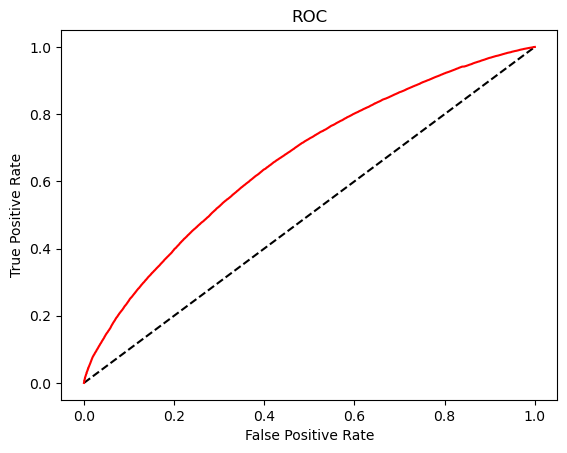

In [44]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Train ccuracy of decision tree: 0.9991931346598039
Test accuracy of decision tree: 0.6599420021773269


In [47]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.66155254 0.65642236 0.66201016 0.66364797 0.65998699 0.66095041
 0.66314218 0.65728118 0.66207428 0.66171299]
Cross_val scores average:  0.6608781065739835


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
print("Train ccuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test

Train ccuracy of random forest 0.9992750254704507
Test accuracy of random forest 0.662186768403711


In [1]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

NameError: name 'rf' is not defined

In [50]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[73814  3122]
 [22387  4474]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.96      0.85     76936
           1       0.59      0.17      0.26     26861

    accuracy                           0.75    103797
   macro avg       0.68      0.56      0.56    103797
weighted avg       0.72      0.75      0.70    103797



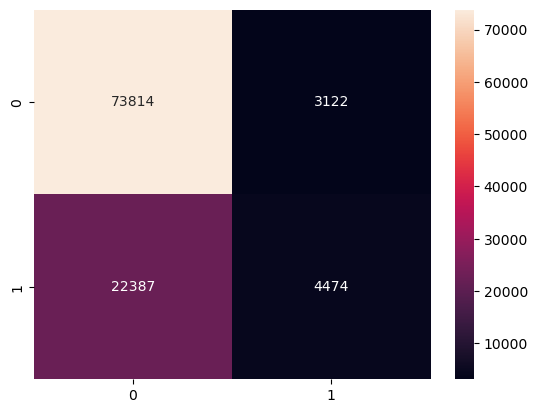

In [52]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [53]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('Logistic Regression', logreg)], 
                       voting='soft', weights=[2,1]).fit(x_train,y_train)
print('The train accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_train,y_train))
print('The test accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_test,y_test))

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The train accuracy for Random Forest and Logistic Regression is: 0.9829329916399117
The test accuracy for Random Forest and Logistic Regression is: 0.7534321801208127
